In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df_train = pd.read_csv("titanic_data.csv") #https://www.kaggle.com/hesh97/titanicdataset-traincsv

## 1.1 Upoznavanje sa bazom

Prvo da pogledamo kako izgleda skup podataka:
Koliko ima vrsta i kolona?
Koji su nazivi obeležja (kolona)?
Koja obeležja su numerička, a koja kategorička?
Da li neki podaci nedostaju?
Funkcije **shape** i **info** daće nam odgovore na ova pitanja.  
**head** pokazuje prvih nekoliko vrsta iz baze.

### shape, info, head

In [3]:
print(df_train.shape)

(891, 12)


In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


df train ima 12 kolona (12 obeležja od kojih je jedno ID) i 831 uzorak (broj vrsta odnosno putnika).  
Za obelezja Age, Cabin i Embarked nedostaju neke vrednosti. S obzirom da za Cabin nedostaje cak preko 75% podataka, to obelezje cemo odbaciti. Obelezje Age ima oko 20% nedostajucih podataka, iako je to bas mnogo, dopunicemo sa medijanom. Obelezje Embarked nedostaje za svega 2 uzorka, tako da cemo odbaciti ta dva uzorka. Obelezja PassengerId i Name, s obzirom da su jedinstvena za svakog putnika, nisu nam korisna u analizi pa ce biti odbacena.

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [7]:
df_train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace= True, axis = 1)

In [8]:
df_train.loc[df_train['Embarked'].isnull()].index

Int64Index([61, 829], dtype='int64')

In [9]:
df_train.drop([61,829], inplace= True, axis = 0)

In [10]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

In [11]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Embarked,0,0.0
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0


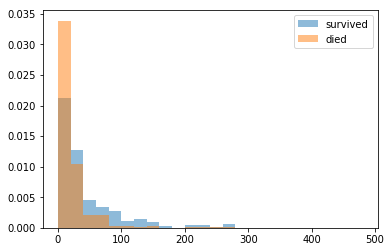

In [12]:
fare_survived=df_train.loc[df_train['Survived']==1, 'Fare']
fare_died=df_train.loc[df_train['Survived']==0, 'Fare']
plt.hist(fare_survived, bins=np.arange(0,500,20), alpha=0.5, label='survived', density=True)
plt.hist(fare_died, bins=np.arange(0,500,20), alpha=0.5, label='died', density=True)
plt.legend()

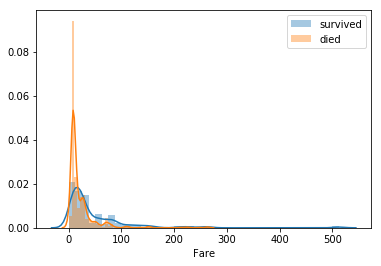

In [13]:
age_survived=df_train.loc[df_train['Survived']==1, 'Age']
age_died=df_train.loc[df_train['Survived']==0, 'Age']
sns.distplot(fare_survived, label='survived')
sns.distplot(fare_died, label='died')
plt.legend()

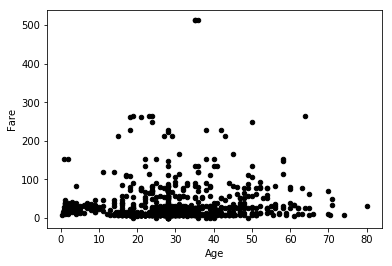

In [14]:
df_train.plot.scatter(x='Age', y='Fare', c="black")

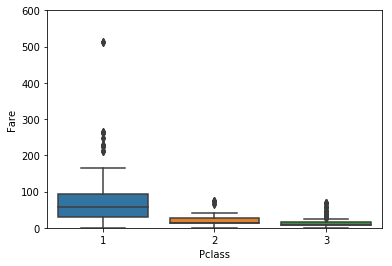

In [15]:
fig = sns.boxplot(x='Pclass', y="Fare", data=df_train)
fig.axis(ymin=0, ymax=600);

## 1.4 Međusobni odnosi (korelacija) numeričkih varijabli

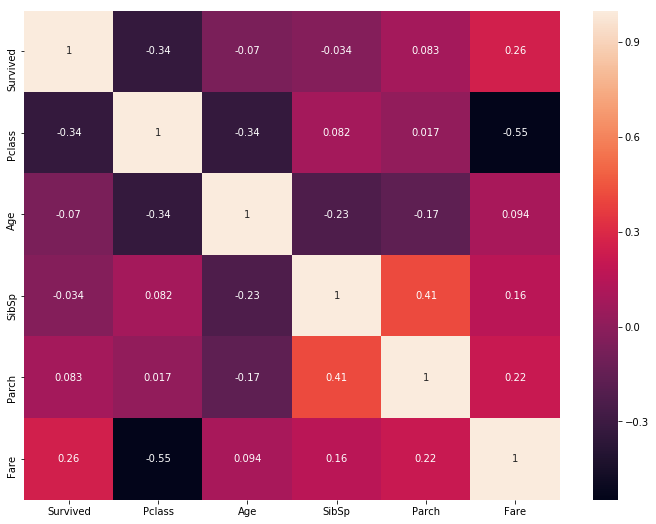

In [16]:
corr = df_train.corr()
f = plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True);

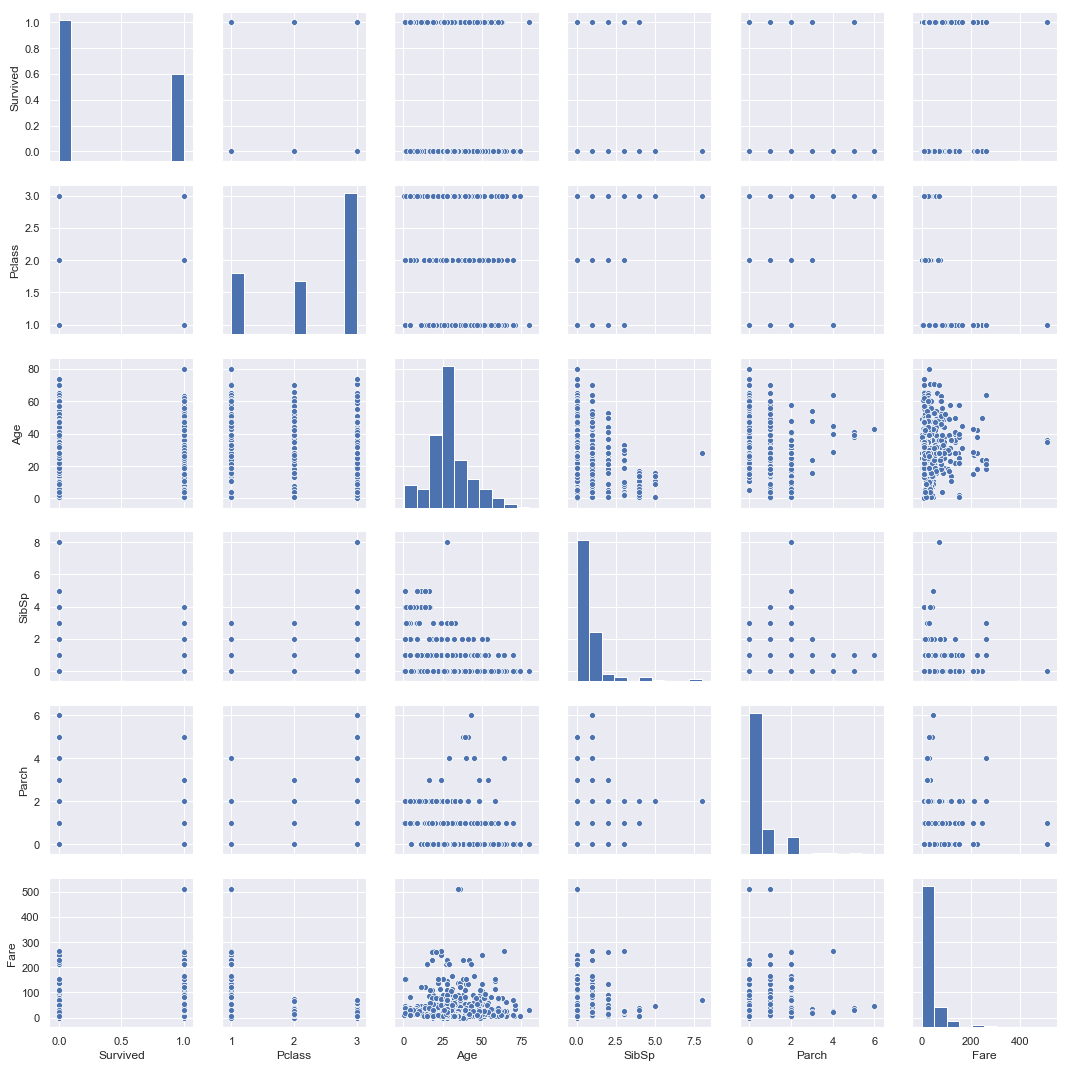

In [17]:
sns.set()
sns.pairplot(df_train, height = 2.5)
plt.show();

In [18]:
categorical_feats = np.concatenate((df_train.dtypes[df_train.dtypes == "int64"].index, df_train.dtypes[df_train.dtypes == "object"].index))
print("Number of Categorical features: ", len(categorical_feats))

for catg in list(categorical_feats) :
    print(df_train[catg].value_counts())
    print('#'*50)

Number of Categorical features:  6
0    549
1    340
Name: Survived, dtype: int64
##################################################
3    491
1    214
2    184
Name: Pclass, dtype: int64
##################################################
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
##################################################
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
##################################################
male      577
female    312
Name: Sex, dtype: int64
##################################################
S    644
C    168
Q     77
Name: Embarked, dtype: int64
##################################################


Razne korisne vizualizacije

In [19]:
pd.crosstab(df_train['Pclass'],df_train['Sex']).style.background_gradient(cmap='summer_r')

Sex,female,male
Pclass,,
1,92,122
2,76,108
3,144,347


In [20]:
pd.crosstab(df_train['Pclass'],df_train['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


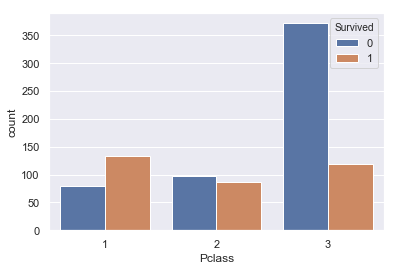

In [21]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)


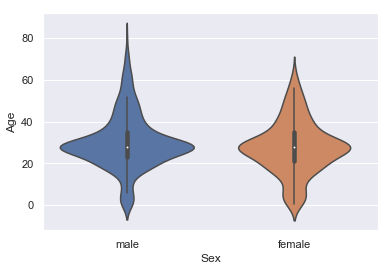

In [22]:
sns.violinplot(x='Sex', y='Age', data=df_train)


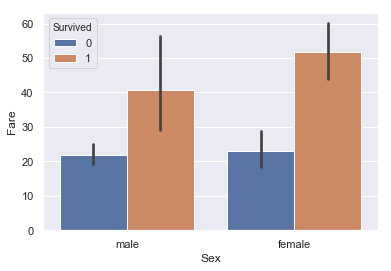

In [23]:
sns.barplot(x='Sex',y='Fare',hue='Survived',data=df_train)


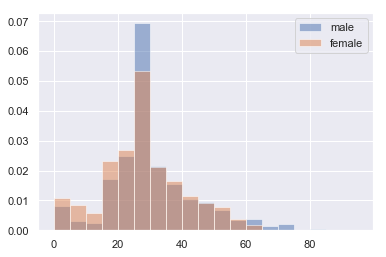

In [24]:
hist_a=plt.hist(df_train.loc[df_train['Sex']=='male','Age'], bins=np.arange(0,100,5), alpha=.50, density=True, label='male')
#fig = plt.figure()
hist_b=plt.hist(df_train.loc[df_train['Sex']=='female','Age'], bins=np.arange(0,100,5), alpha=.50, density=True, label='female')
plt.legend()